In [1]:
# If you want to install any missing packages, then uncomment the lines given below and run them 
# to ensure that you have all the dependencies you need to run the notebook.
import sys
!{sys.executable} -m pip install 'missingno'


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Libraries
import pandas as pd
import numpy as np
import missingno as mno
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load training data
data = pd.read_csv('train.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195
1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366
2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000
3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197
4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561


In [5]:
# Dimensions of training data
data.shape

(362, 16)

In [6]:
# Explore columns
data.columns

Index(['surface_area', 'agricultural_land', 'forest_area',
       'armed_forces_total', 'urban_pop_major_cities',
       'urban_pop_minor_cities', 'national_income', 'inflation_annual',
       'inflation_monthly', 'inflation_weekly', 'mobile_subscriptions',
       'internet_users', 'secure_internet_servers_total',
       'improved_sanitation', 'women_parliament_seats_rate',
       'life_expectancy'],
      dtype='object')

In [7]:
# Description
data.describe()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,inflation_annual,inflation_monthly,inflation_weekly,secure_internet_servers_total,life_expectancy
count,3.620000e+02,3.580000e+02,3.570000e+02,3.180000e+02,360.000000,360.000000,146.000000,156.000000,20.000000,3.520000e+02,362.000000
mean,4.021884e+06,1.594881e+08,1.204151e+08,9.849864e+05,27.659456,29.175242,1.681539,0.475969,0.396478,2.949654e+08,71.059691
std,1.234491e+07,4.964143e+08,3.796623e+08,2.994686e+06,20.512885,21.206494,0.980308,0.153430,0.203583,7.234006e+08,8.332818
min,3.030000e+01,3.000000e+02,0.000000e+00,5.000000e+01,0.091444,0.074575,-2.372263,0.250543,0.209993,4.002500e+04,48.850634
25%,2.783000e+04,1.054198e+06,4.951445e+05,1.218000e+04,10.624625,11.013743,1.202953,0.347799,0.232118,3.468446e+06,65.469854
50%,2.037745e+05,5.360256e+06,3.928535e+06,5.352500e+04,24.459439,26.735127,1.762683,0.459790,0.297938,2.671228e+07,73.238024
75%,1.081610e+06,4.221935e+07,2.241297e+07,2.598000e+05,38.587177,43.499418,2.485675,0.577340,0.537541,2.173937e+08,77.125610
max,1.343253e+08,5.067600e+09,4.132117e+09,2.720662e+07,92.409069,89.142904,2.997694,0.810152,0.781527,8.207343e+09,83.480488


In [8]:
# Check Datatypes
data.dtypes

surface_area                     float64
agricultural_land                float64
forest_area                      float64
armed_forces_total               float64
urban_pop_major_cities           float64
urban_pop_minor_cities           float64
national_income                   object
inflation_annual                 float64
inflation_monthly                float64
inflation_weekly                 float64
mobile_subscriptions              object
internet_users                    object
secure_internet_servers_total    float64
improved_sanitation               object
women_parliament_seats_rate       object
life_expectancy                  float64
dtype: object

In [9]:
# Print head or tail
data.tail(20)

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
342,75420.0,2.289789e+06,4.717352e+06,12000.0,4.872304,61.121696,medium low,NaN,0.335597,NaN,more than 1 per person,44 per 100 people,9.117943e+07,medium access,[0%-25%),77.419220
343,406752.0,2.209852e+07,1.635383e+07,25450.0,10.615161,48.558839,low,2.683857,NaN,NaN,more than 1 per person,369 per 1000 people,1.623962e+07,high access,[0%-25%),72.799171
344,1285220.0,2.443324e+07,7.461124e+07,192000.0,44.792876,33.161124,medium low,2.816503,NaN,NaN,less than 1 per person,392 per 1000 people,2.123312e+07,medium access,[0%-25%),74.283854
345,238390.0,1.441035e+07,6.966920e+06,151300.0,45.980866,8.254134,medium low,NaN,0.332113,NaN,more than 1 per person,50 per 100 people,6.895622e+07,high access,[0%-25%),74.463415
346,960.0,4.870000e+04,5.360000e+04,NaN,58.590211,5.311789,low,NaN,0.675524,NaN,less than 1 per person,230 per 1000 people,4.934589e+07,low access,[0%-25%),66.259512
347,196710.0,9.111618e+06,8.534351e+06,18600.0,33.820814,9.258186,very low,0.698627,NaN,NaN,less than 1 per person,131 per 1000 people,2.179869e+06,low access,[25%-50%),65.878756
348,637660.0,4.485087e+07,6.623801e+06,11000.0,24.079072,14.532928,unknown,NaN,NaN,NaN,less than 1 per person,15 per 1000 people,NaN,no info,[0%-25%),55.023024
349,1219090.0,9.731998e+07,9.286706e+06,77150.0,6.464738,57.323262,medium low,NaN,0.453773,NaN,more than 1 per person,46 per 100 people,8.606501e+07,medium access,[25%-50%),56.736585
350,5136164.0,2.916705e+08,8.947392e+07,4629950.0,24.411017,7.776594,very low,NaN,0.632679,NaN,less than 1 per person,138 per 1000 people,3.273938e+06,low access,[0%-25%),67.780921
351,620.0,1.077377e+04,2.075475e+04,NaN,0.993859,17.465141,medium low,1.472018,NaN,NaN,more than 1 per person,46 per 100 people,7.130907e+07,very high access,[0%-25%),74.912707


# Data Wrangling and Preprocessing

In [10]:
# Check for any null or missing values
data.isnull().values.any()

True

In [11]:
# Check missing values in each column of training data
data.isnull().sum()

surface_area                       0
agricultural_land                  4
forest_area                        5
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
dtype: int64

In [12]:
# print(data['mobile_subscriptions'].dtype)

col_list = [c for c in data.columns if data[c].dtype == 'object']
col_list

['national_income',
 'mobile_subscriptions',
 'internet_users',
 'improved_sanitation',
 'women_parliament_seats_rate']

In [13]:
data['women_parliament_seats_rate'].unique().tolist()

['[0%-25%)', 'unknown', '[25%-50%)', '[50%-75%)']

In [14]:
# Make a copy of data
train_data = data.copy()

In [16]:
# Change data types of columns
for c in col_list:
    if c != 'internet_users':
        train_data[c] = train_data[c].astype('category')
        train_data[c] = train_data[c].cat.codes

In [17]:
# Compare Actual and Encoded labels
for c in col_list:
    if c != 'internet_users':
        print('column:', c)
        print(data[c].unique().tolist())
        print(train_data[c].unique().tolist(), '\n')

column: national_income
['unknown', 'very low', 'high', 'medium low', 'medium high', 'low', 'very high']
[4, 6, 0, 3, 2, 1, 5] 

column: mobile_subscriptions
['less than 1 per person', 'more than 1 per person', 'more than 2 per person', 'unknown', 'more than 3 per person']
[0, 1, 2, 4, 3] 

column: improved_sanitation
['high access', 'low access', 'no info', 'very high access', 'medium access', 'very low access']
[0, 1, 3, 4, 2, 5] 

column: women_parliament_seats_rate
['[0%-25%)', 'unknown', '[25%-50%)', '[50%-75%)']
[0, 3, 1, 2] 



In [18]:
train_data['internet_users'].head()

0      0 per 1000 people
1    154 per 1000 people
2      90 per 100 people
3      76 per 100 people
4    350 per 1000 people
Name: internet_users, dtype: object

In [19]:
# Convert unknown in internet_uses to -1
train_data.loc[train_data['internet_users'] == 'unknown', 'internet_users'] = -1

In [20]:
train_data.loc[train_data['internet_users'].str.split(' ').str[2] == '1000', 
               'internet_users'] = train_data['internet_users'].str.split(' ').str[0].astype(float)

In [21]:
train_data.loc[train_data['internet_users'].str.split(' ').str[2] == '100', 
               'internet_users'] = train_data['internet_users'].str.split(' ').str[0].astype(float) * 10

In [22]:
train_data['internet_users'] = train_data['internet_users'].astype(float) 

In [23]:
train_data.isnull().sum()

surface_area                       0
agricultural_land                  4
forest_area                        5
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
dtype: int64

In [24]:
train_data = train_data.drop(columns=['inflation_monthly', 'inflation_weekly'])

In [25]:
# Deal with Missing Values
columns = ['agricultural_land', 'forest_area', 'armed_forces_total', 
           'urban_pop_minor_cities', 'urban_pop_major_cities', 'secure_internet_servers_total']

for c in columns:
    missing_vals = train_data[c].isnull().sum()
    observed_vals = train_data.loc[train_data[c].notnull(), c]
    train_data.loc[train_data[c].isnull(), c] = observed_vals.mean()
#     df.loc[df[c].isnull(), c] = np.random.choice(observed_vals, missing_vals, replace = True)


In [26]:
train_data.isnull().sum()

surface_area                       0
agricultural_land                  0
forest_area                        0
armed_forces_total                 0
urban_pop_major_cities             0
urban_pop_minor_cities             0
national_income                    0
inflation_annual                 216
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total      0
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
dtype: int64

In [27]:
from sklearn import linear_model

# Regression to impute missing values in inflation_annual
# params = [c for c in train_data.columns if c != 'inflation_annual']
X = train_data[train_data['inflation_annual'].notnull()]
y = train_data.loc[train_data['inflation_annual'].notnull(), 'inflation_annual']
X = X.drop(columns=['inflation_annual'])
print(X.shape, y.shape)

(146, 13) (146,)


In [28]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [29]:
X_miss = train_data[train_data['inflation_annual'].isnull()]
X_miss = X_miss.drop(columns = ['inflation_annual'])
print(X_miss.shape)

(216, 13)


In [30]:
train_data.loc[train_data['inflation_annual'].isnull(), 'inflation_annual'] = model.predict(X_miss)

In [31]:
train_data.isnull().sum()

surface_area                     0
agricultural_land                0
forest_area                      0
armed_forces_total               0
urban_pop_major_cities           0
urban_pop_minor_cities           0
national_income                  0
inflation_annual                 0
mobile_subscriptions             0
internet_users                   0
secure_internet_servers_total    0
improved_sanitation              0
women_parliament_seats_rate      0
life_expectancy                  0
dtype: int64

# Data Analysis and Visualizations

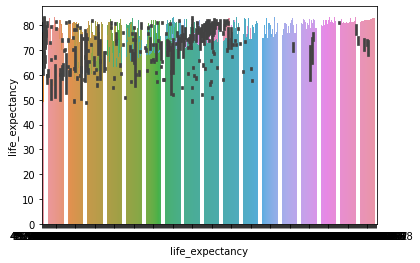

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
# plot joint plots
cols = train_data.columns.values
for c in cols:
    sns.barplot(x=c, y='life_expectancy', data=train_data)
plt.show()


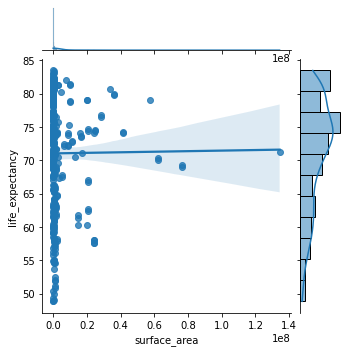

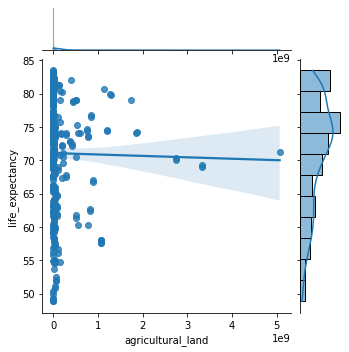

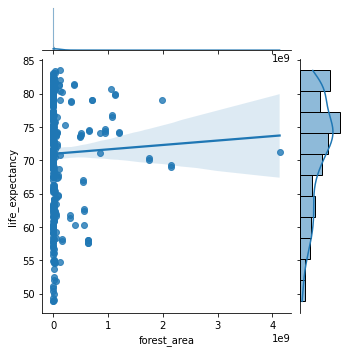

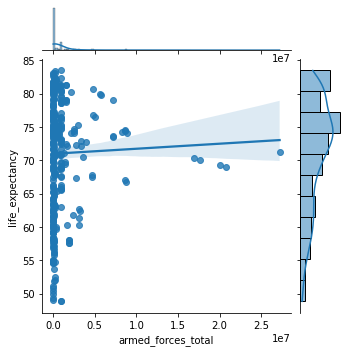

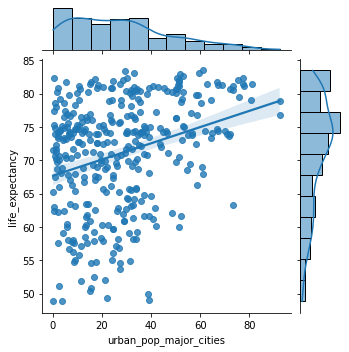

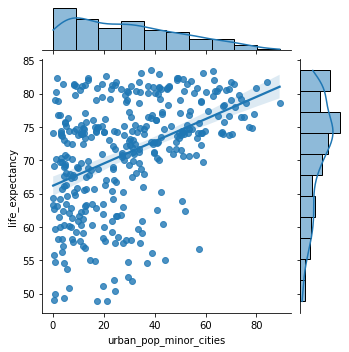

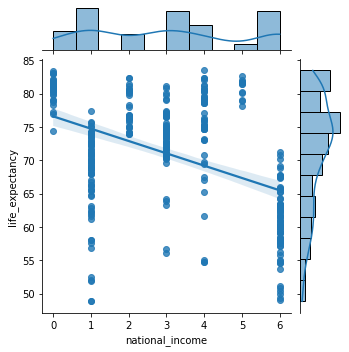

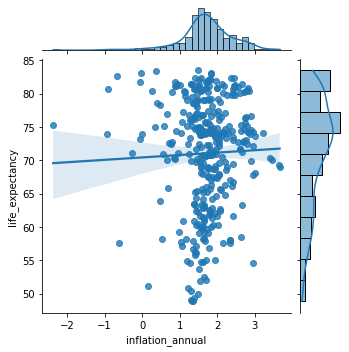

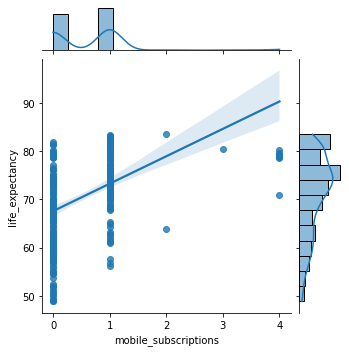

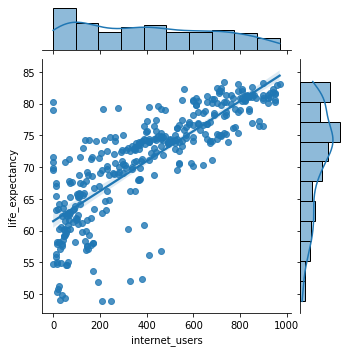

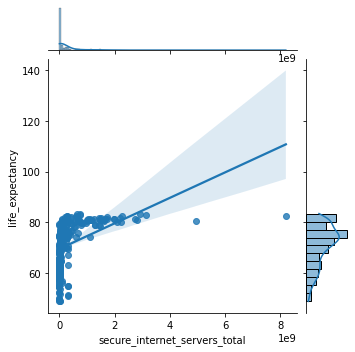

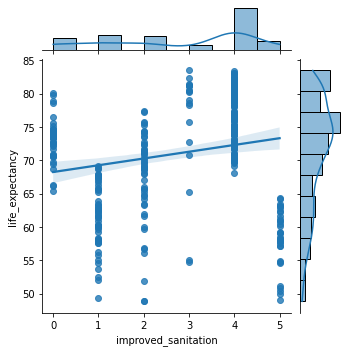

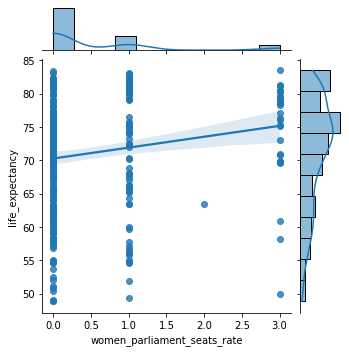

In [32]:
# plot joint plots
cols = train_data.columns.values
for c in cols:
    if c != "life_expectancy":
        sns.jointplot(x=c, y="life_expectancy", data=train_data, kind = 'reg', height = 5)
plt.show()

<Axes: >

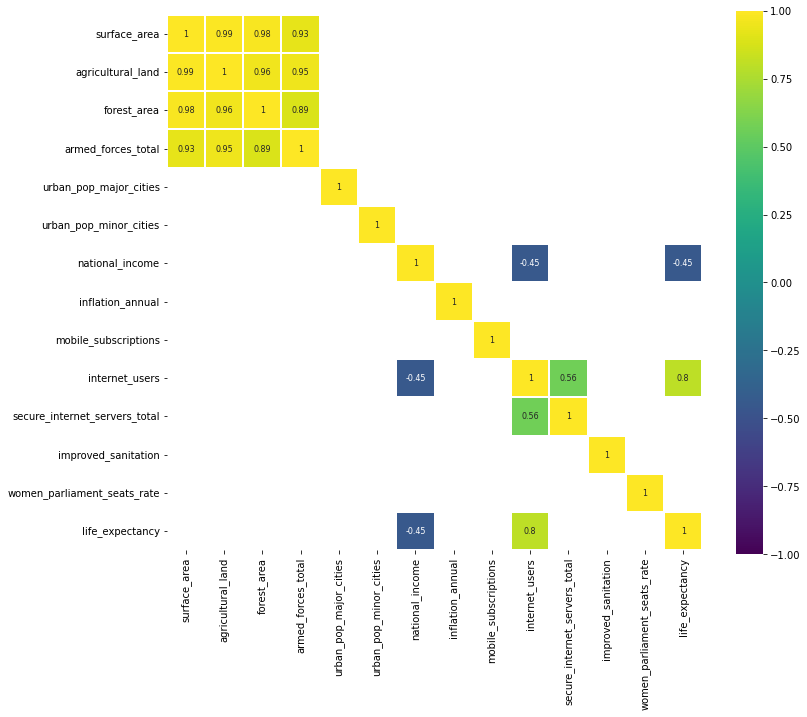

In [33]:
# Correlation heatmap
corr = train_data.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

/home/sabahat/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


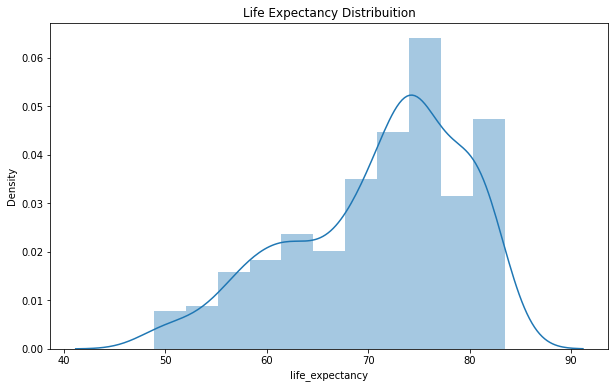

In [34]:
# distribution plot of target variable (life expectancy)
plt.figure(figsize = (10, 6))
plt.title('Life Expectancy Distribuition')
sns.distplot(train_data['life_expectancy'])
plt.show()

In [35]:
# We have already removed inflation monthly and weekly. 
# Fetures agricultural_land and forest_area are highly correlated with surface_area. 
# Remove agricultural_land and forest_area and keep surface_area only

train_data = train_data.drop(columns=['agricultural_land', 'forest_area'])
train_data.shape

(362, 12)

In [36]:
# Standardize data
from sklearn.preprocessing import StandardScaler

# Columns not to be standardized. These are columns with categorical data, 
# also we don't standardize our target vraiable
cols = ['national_income', 'mobile_subscriptions', 'life_expectancy',
        'improved_sanitation', 'women_parliament_seats_rate']

# Pick remaining columns and standardize them 
columns = [c for c in train_data.columns if c not in cols]
scaler = StandardScaler()
scaler.fit(train_data[columns])
train_data[columns] = scaler.transform(train_data[columns])


In [37]:
# Train Test Split

from sklearn.model_selection import train_test_split
y = train_data['life_expectancy']
X = train_data.drop(columns=['life_expectancy'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (289, 11)
Validation Set Dimensions: (73, 11)


In [38]:
# Train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

randomf = RandomForestRegressor(n_estimators=200)
randomf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [39]:
# Measure mean absolute error for training and validation sets
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, randomf.predict(X_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, randomf.predict(X_test)))

Mean Absolute Error for Training Set: 0.9424515000691913
Mean Absolute Error for Test Set: 3.147872325756842


feature: surface_area = 0.04822324146080728
feature: armed_forces_total = 0.04433149409472741
feature: urban_pop_major_cities = 0.01829275325148947
feature: urban_pop_minor_cities = 0.03240838451139509
feature: national_income = 0.03299361178152648
feature: inflation_annual = 0.046875250970882104
feature: mobile_subscriptions = 0.008562626919730726
feature: internet_users = 0.639759924071235
feature: secure_internet_servers_total = 0.10249208406916785
feature: improved_sanitation = 0.019514918000457758
feature: women_parliament_seats_rate = 0.006545710868580848


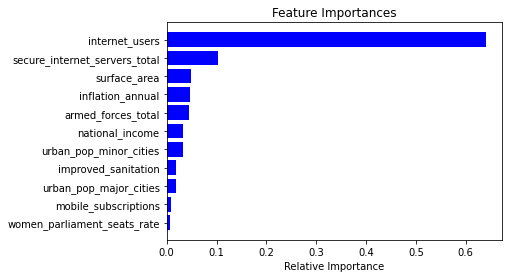

In [40]:
# important features for random forest regressor
for name, importance in zip(X.columns, randomf.feature_importances_):
    print('feature:', name, "=", importance)
    
importances = randomf.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [41]:
# parameter grid for fine-tuning random forest regressor 
# you can take a look at scikit-learn official documentation 
# where you'll find the parameters of random forest regressor
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [5, 10, 12], 
          'max_features': [2, 4, 6], 
          'min_samples_leaf': [3, 4, 5], 
          'min_samples_split': [8, 10, 12], 
          'n_estimators': [100, 200, 300]}

k = 5
score_param = 'neg_mean_absolute_error'
rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator=rf, param_grid=params, scoring=score_param, n_jobs=-1, cv=k, verbose=True)
rf_grid.fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 12], 'max_features': [2, 4, 6],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=True)

In [43]:
# get best model (trained on best set of params) from grid search cv
best_model = rf_grid.best_estimator_

# get best model predictions for training and validation sets
predict_train = best_model.predict(X_train)
predict_test = best_model.predict(X_test)

# print mean absolute error for predictions taken from the best model 
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, predict_train))
print('Mean Absolute Error for Validation Set:', mean_absolute_error(y_test, predict_test))

Mean Absolute Error for Training Set: 1.752529976211758
Mean Absolute Error for Validation Set: 3.187183245450123
